In [1]:
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('/content/data_clima_numerico_limpia.csv')
data.head(10)

,Unnamed: 0,humedad,velocidad_viento_kmh,rumbo_viento_grados,visibilidad_km,presion_mbar,lluvia,descripcion,temperatura
0,0,0.92,11.27,130.0,8.05,1021.60,no,Cold,-0.56
1,1,0.73,20.93,330.0,16.10,1017.00,si,Warm,21.11
2,2,0.97,5.97,193.0,14.91,1013.99,si,Normal,16.60
3,3,0.82,3.22,300.0,16.10,1031.59,si,Cold,1.60
4,4,0.60,10.88,116.0,9.98,1020.88,si,Cold,2.19
5,5,0.32,21.46,190.0,10.35,1015.33,si,Warm,27.54
6,6,0.84,7.97,170.0,11.13,1009.04,si,Warm,19.98
7,7,0.86,14.49,30.0,15.13,1009.60,si,Normal,11.11
8,8,0.73,14.01,351.0,15.83,1018.39,si,Normal,8.41
9,9,0.81,6.44,320.0,7.86,1003.89,si,Cold,1.70


In [7]:
data[['humedad','temperatura']].head(15)

,humedad,temperatura
0,0.92,-0.56
1,0.73,21.11
2,0.97,16.60
3,0.82,1.60
4,0.60,2.19
5,0.32,27.54
6,0.84,19.98
7,0.86,11.11
8,0.73,8.41
9,0.81,1.70


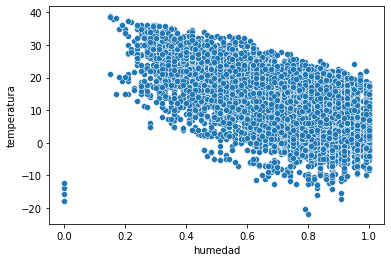

In [9]:
sns.scatterplot(data = data, x='humedad', y='temperatura')

El objetivo que tenemos es encontrar una recta que describa los puntos de arriba. Para eso queremos encoentrar la pendiente y la ordenada al origen de esa recta segun los datos de entrenamiento.

In [12]:
from sklearn.model_selection import train_test_split

X = data['humedad']
y = data['temperatura']

x_train, x_test, y_train, y_test = train_test_split(X,y)




In [17]:
import numpy as np

x_train_m = x_train.to_numpy()
x_train_m = np.matrix(x_train_m.reshape(len(x_train_m),1))

x_test_m = x_test.to_numpy()
x_test_m = np.matrix(x_test_m.reshape(len(x_test_m),1))

In [20]:
# Importamos una regresion lineal 
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(x_train_m,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LinearRegression()

In [21]:
print (f'El coeficiente que encontro el modelo para el termino lineal a es: {modelo.coef_}')
print (f'La ordenada al origen que encontro el modelo es :{modelo.intercept_}')

El coeficiente que encontro el modelo para el termino lineal a es: [-30.57480089]
La ordenada al origen que encontro el modelo es :34.34114603271044


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


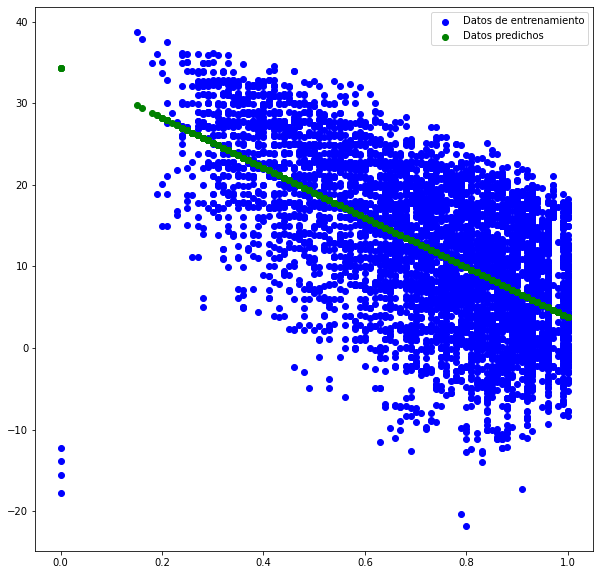

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.scatter(x_train, y_train, color = 'b', label = 'Datos de entrenamiento')
y_pred = modelo.predict(x_train_m)
plt.scatter(x_train, y_pred, color = 'g', label = 'Datos predichos')
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


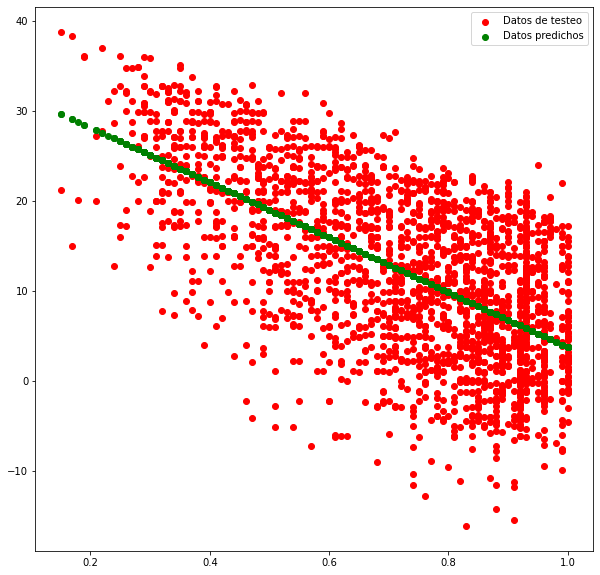

In [27]:

plt.figure(figsize = (10,10))
plt.scatter(x_test, y_test, color = 'r', label = 'Datos de testeo')
y_pred = modelo.predict(x_test_m)
plt.scatter(x_test, y_pred, color = 'g', label = 'Datos predichos')
plt.legend()
plt.show()

In [29]:
# Como chequeamos matematicamente?

# una manera es ver el error cuadratico medio
from sklearn.metrics import mean_squared_error
y_pred = modelo.predict(x_test_m)
mean_squared_error(y_test, y_pred)
# Otra manera es el R2

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


0.401350230826232

Vamos a ver como trabajar con varias variables a la vez

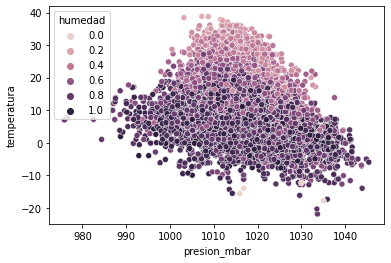

In [35]:
sns.scatterplot(data = data, x='presion_mbar', y='temperatura', hue='humedad')

In [37]:
from sklearn.model_selection import train_test_split

X = data[['humedad','velocidad_viento_kmh','visibilidad_km','presion_mbar']]
y = data['temperatura']

x_train, x_test, y_train, y_test = train_test_split(X,y)

In [40]:
modelo = LinearRegression()
modelo.fit(x_train,y_train)

LinearRegression()

In [47]:
print (f'Los coeficientes para los columnas que elegimos son: {modelo.coef_}')
print (f'La ordenada al origen es: {modelo.intercept_}')


Los coeficientes para los columnas que elegimos son: [-30.16432392  -0.30381822   0.30772173  -0.3811653 ]
La ordenada al origen es: 421.6657156751895


In [48]:
# una manera es ver el error cuadratico medio
from sklearn.metrics import mean_squared_error
y_pred = modelo.predict(x_test)
print (f'El error cuadratico dar: {mean_squared_error(y_test, y_pred)}')
# Otra manera es el R2

from sklearn.metrics import r2_score
print (f'El R cuadrado da: {r2_score(y_test, y_pred)}')

El error cuadratico dar: 43.13477258692252
El R cuadrado da: 0.5202881904141001
